In [48]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator


data_aug_gen = ImageDataGenerator(rescale=1. / 255,
                                 rotation_range=30,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.5,
                                 zoom_range=[0.8, 2.0],
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest')

ad_set = data_aug_gen.flow_from_directory('C:\\Users\\kimkm\\광고\\ad',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

non_ad_set = data_aug_gen.flow_from_directory('C:\\Users\\kimkm\\광고\\non-ad',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


# img = load_img(fname)
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)

# i = 0
# save_to_dir = fname.split("\\")[4] + "/" + fname.split("\\")[5]
# if not save_to_dir == "C:\\Users\\kimkm\\광고":
#     for batch in data_aug_gen.flow(x, batch_size = 1, save_to_dir=save_to_dir, save_prefix='plus_'+str(file_name_freq),
#                                   save_format='jpg')
    
#     i += 1
#     if i > 10:
#         break

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'dataset/training_set'

In [202]:
#본 코드 시작

from PIL import Image
import glob, sys, numpy as np
from sklearn.model_selection import train_test_split
from  keras.utils import np_utils

img_dir = 'C:\\Users\\kimkm\\광고'
categories = ['ad', 'non-ad']
np_classes = len(categories)

image_w = 200
image_h = 200


pixel = image_h * image_w * 3 # RGB 값

X = []
y = []

for idx, ad in enumerate(categories):
    img_dir_detail = img_dir + "\\" + ad
    files = glob.glob(img_dir_detail+"/*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            #Y는 0 아니면 1이니까 idx값으로 넣는다.
            X.append(data)
            y.append(idx)
            #if i % 300 == 0:
            print(ad, " : ", f)
        except:
            print(ad, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)


# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# xy = (X_train, X_test, Y_train, Y_test)
# np.save("C:\\Users\\kimkm\\광고\\numpy_data\\binary_image_data.npy", xy)

ad  :  C:\Users\kimkm\광고\ad\07941e28def70ed4b867d88bcb92986e.jpg
ad  :  C:\Users\kimkm\광고\ad\1.jpg
ad  :  C:\Users\kimkm\광고\ad\10.jpg
ad  :  C:\Users\kimkm\광고\ad\100.jpg
ad  :  C:\Users\kimkm\광고\ad\101.jpg
ad  :  C:\Users\kimkm\광고\ad\102.jpg
ad  :  C:\Users\kimkm\광고\ad\103.jpg
ad  :  C:\Users\kimkm\광고\ad\104.jpg
ad  :  C:\Users\kimkm\광고\ad\105.jpg
ad  :  C:\Users\kimkm\광고\ad\106.jpg
ad  :  C:\Users\kimkm\광고\ad\107.jpg
ad  :  C:\Users\kimkm\광고\ad\108.jpg
ad  :  C:\Users\kimkm\광고\ad\109.jpg
ad  :  C:\Users\kimkm\광고\ad\11.jpg
ad  :  C:\Users\kimkm\광고\ad\110.jpg
ad  :  C:\Users\kimkm\광고\ad\111.jpg
ad  :  C:\Users\kimkm\광고\ad\11134366611094344874.jpg
ad  :  C:\Users\kimkm\광고\ad\112.jpg
ad  :  C:\Users\kimkm\광고\ad\113.jpg
ad  :  C:\Users\kimkm\광고\ad\114.jpg
ad  :  C:\Users\kimkm\광고\ad\115.jpg
ad  :  C:\Users\kimkm\광고\ad\116.jpg
ad  :  C:\Users\kimkm\광고\ad\117.jpg
ad  :  C:\Users\kimkm\광고\ad\118.jpg
ad  :  C:\Users\kimkm\광고\ad\119.jpg
ad  :  C:\Users\kimkm\광고\ad\12.jpg
ad  :  C:\Users\kimkm\광

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

#X_train, X_test, y_train, y_test = np.load("C:\\Users\\kimkm\\광고\\numpy_data\\binary_image_data.npy", allow_pickle=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(y_train))
print(np.bincount(y_test))

(978, 200, 200, 3)
978
[482 496]
[114 131]


In [204]:
                                                """Dropout 사용"""

import os

image_w = 200
image_h = 200
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


with K.tf_ops.device('/device:GPU:0'): # batch_normalization 삭제
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu")) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model_dir = 'C:\\Users\\kimkm\\광고\\model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "\\ad_non_ad_classify.model"
    
    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    #early_stopping = EarlyStopping(monitor='val_loss', patience=7)
    #model.save('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model.h5')

In [205]:
                                            """ BatchNormalization 사용"""

# import os

# image_w = 200
# image_h = 200
# X_train = X_train.astype('float32') / 255
# X_test = X_test.astype('float32') / 255


# with K.tf_ops.device('/device:GPU:0'): # batch_normalization 삭제
#     model = Sequential()
    
#     model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
    
#     model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(BatchNormalization())

#     model.add(Conv2D(64, (3,3), padding="same", activation="relu")) 
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(BatchNormalization())
    
#     model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(BatchNormalization())
    
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(BatchNormalization())

#     model.add(Flatten())
#     model.add(Dense(256, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation="sigmoid"))
    
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#     model_dir = 'C:\\Users\\kimkm\\광고\\model'
#     if not os.path.exists(model_dir):
#         os.mkdir(model_dir)
#     model_path = model_dir + "\\ad_non_ad_classify.model"
    
#     checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
#     #early_stopping = EarlyStopping(monitor='val_loss', patience=7)
#     #model.save('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model.h5')

In [206]:
########################## 구현 미상 ######################

# VGG 16 모델

# import os

# image_w = 64
# image_h = 64
# X_train = X_train.astype('float32') / 255
# X_test = X_test.astype('float32') / 255


# with K.tf_ops.device('/device:GPU:0'):
#     model = Sequential()
    
#     model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
#     model.add(BatchNormalization())

#     model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Flatten())
#     model.add(Dense(256, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation="sigmoid"))
    
#     #adam = tf.keras.optimizers.Adam(lr = 0.001)
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#     model_dir = 'C:\\Users\\kimkm\\광고\\model'
#     if not os.path.exists(model_dir):
#         os.mkdir(model_dir)
#     model_path = model_dir + "\\ad_non_ad_classify.model"
    
#     #checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
#     #early_stopping = EarlyStopping(monitor='val_loss', patience=7)  # 깊은 학습에는 early stopping이 필요 없음
    
#     model.save('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model.h5')


In [207]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 25, 25, 64)      

In [208]:
#history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[checkpoint, early_stopping])
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/70
13/13 [==============================] - ETA: 0s - loss: 0.7308 - accuracy: 0.5064
Epoch 00001: val_loss improved from inf to 0.69204, saving model to C:\Users\kimkm\광고\model\ad_non_ad_classify.model
INFO:tensorflow:Assets written to: C:\Users\kimkm\광고\model\ad_non_ad_classify.model\assets
13/13 [==============================] - 19s 1s/step - loss: 0.7308 - accuracy: 0.5064 - val_loss: 0.6920 - val_accuracy: 0.6122
Epoch 2/70
13/13 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5115
Epoch 00002: val_loss improved from 0.69204 to 0.69050, saving model to C:\Users\kimkm\광고\model\ad_non_ad_classify.model
INFO:tensorflow:Assets written to: C:\Users\kimkm\광고\model\ad_non_ad_classify.model\assets
13/13 [==============================] - 20s 2s/step - loss: 0.6915 - accuracy: 0.5115 - val_loss: 0.6905 - val_accuracy: 0.4898
Epoch 3/70
13/13 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5269
Epoch 00003: val_loss improved from 0.69

In [209]:
print("정확도 : %.2f " %(model.evaluate(X_test, y_test, batch_size = 64)[1]))

4/4 [==============================] - 1s 240ms/step - loss: 0.6866 - accuracy: 0.8653
정확도 : 0.87 


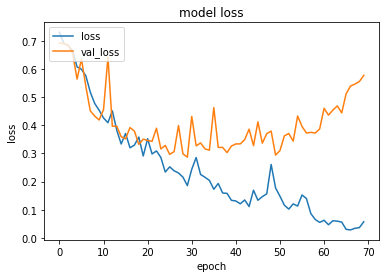

In [210]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

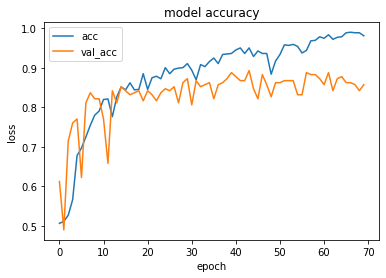

In [211]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [212]:
from PIL import Image
#import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model

import tensorflow as tf

seed = 5
tf.random.set_seed(seed)
np.random.seed(seed)

caltech_dir = 'C:\\Users\\kimkm\\광고\\test'


image_w = 200
image_h = 200

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.jpg")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)

    filenames.append(f)
    X.append(data)
    
X = np.array(X)
X = X.astype(float) / 255

model = load_model('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model')
#model = load_model('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model.h5')


prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
cnt = 0
for i in prediction:
    if i >= 0.5: print("해당 " + filenames[cnt].split("\\")[4] + filenames[cnt].split("\\")[5] + "  이미지는 광고 로 추정됩니다.")
    else : print("해당 " + filenames[cnt].split("\\")[4] + filenames[cnt].split("\\")[5] + "  이미지는 비광고 로 추정됩니다.")
    cnt += 1

해당 test1.jpg  이미지는 광고 로 추정됩니다.
해당 test2.jpg  이미지는 비광고 로 추정됩니다.
해당 test3.jpg  이미지는 광고 로 추정됩니다.
해당 test4.jpg  이미지는 비광고 로 추정됩니다.
해당 test5.jpg  이미지는 광고 로 추정됩니다.
해당 test6.jpg  이미지는 비광고 로 추정됩니다.
해당 test7.jpg  이미지는 비광고 로 추정됩니다.
해당 test8.jpg  이미지는 비광고 로 추정됩니다.
해당 test9.jpg  이미지는 비광고 로 추정됩니다.
